In [1]:
import pandas as pd
import numpy as np
import pickle 
import re 

%pprint            # to turn off pretty printing

Pretty printing has been turned OFF


In [2]:
# Reading in the csv files. We're using the whole copora to do some larger quantitative analysis on a larger scale
cepa = pd.read_csv("../private/cepa.csv", index_col=[0])

In [3]:
# PELIC - will need to be filtered a bit
f = open('/Users/elenacimino/Data-Archive/combo_df_1A_pt1.pkl', 'rb')
data = pickle.load(f)
f.close()

target_langs = ['Arabic', 'Korean', 'Spanish']
filters = (data.native_language.isin(target_langs)) & \
          (data.version == 1) & (data.level_id >= 3) & \
          (data.class_code == 'w')

# apply filters to data to get target data
pelic = data[filters]

pelic.sample(5)

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk
answer_id,,,,,,,,,,,
37786,4906,cs7,80560,It is crucial to work hard for passing the test.,w,5,Arabic,1,"[it, is, crucial, to, work, hard, for, passing...",10,"[It, is, crucial, to, work, hard, for, passing..."
2645,299,hb4,15847,'On the tops of the trees the snow clumps into...,w,5,Korean,1,"[on, the, tops, of, the, trees, the, snow, clu...",153,"[', On, the, tops, of, the, trees, the, snow, ..."
1709,160,eg5,12856,There are a lot of different countries in the ...,w,4,Korean,1,"[there, are, a, lot, of, different, countries,...",293,"[There, are, a, lot, of, different, countries,..."
41230,5259,bs5,87246,There is a debate about the necessity to ...,w,4,Arabic,1,"[there, is, a, debate, about, the, necessity, ...",282,"[There, is, a, debate, about, the, necessity, ..."
2298,257,et1,14629,"compound\nI went to Giant Eagle, and I bought ...",w,4,Korean,1,"[compound, i, went, to, giant, eagle, and, i, ...",11,"[compound, I, went, to, Giant, Eagle, ,, and, ..."


In [4]:
cepa.sample(5)

,Filename,Level,Original_Text,Normalized_Essay,Revised_Essay,tokens,token_count,TTR,Guiraud,pos,lemmas
877,200611061,4,\t\t\t\tCEPA 4 200611061\n\n\n A happy...,A happy tripe Eevyone in this life like spendi...,A happy tripe Eevyone in this life like spendi...,"['A', 'happy', 'tripe', 'Eevyone', 'in', 'this...",241,0.468880,7.278970,"[(A, 'DT'), (happy, 'JJ'), (tripe, 'NN'), (Eev...","['a', 'happy', 'tripe', 'eevyone', 'in', 'this..."
889,200600957,5,\t\t\t\tCEPA 5 200600957\n\n\n\n ...,Topic A I went in a holiday with my family to ...,Topic A I went in a holiday with my family to ...,"['Topic', 'A', 'I', 'went', 'in', 'a', 'holida...",274,0.459854,7.611938,"[(Topic, 'NN'), (A, 'DT'), (I, 'PRP'), (went, ...","['topic', 'a', '-PRON-', 'go', 'in', 'a', 'hol..."
1481,200608188,5,\t\t\t\tCEPA 5 200608188\n\n\n\nThere are many...,There are many ways that can the person enjoy ...,There are many ways that can the person enjoy ...,"['There', 'are', 'many', 'ways', 'that', 'can'...",397,0.445844,8.883375,"[(There, 'EX'), (are, 'VBP'), (many, 'JJ'), (w...","['there', 'be', 'many', 'way', 'that', 'can', ..."
551,200600424,5,\t\t\t\tCEPA 5 200600424\n\n\n\nHolidays are s...,Holidays are so important to everyone. People ...,Holidays are so important to everyone. People ...,"['Holidays', 'are', 'so', 'important', 'to', '...",319,0.479624,8.566355,"[(Holidays, 'NNS'), (are, 'VBP'), (so, 'RB'), ...","['holiday', 'be', 'so', 'important', 'to', 'ev..."
1549,200621681,6,\t\t\t\tCEPA 6 200621681\n\n\n\n ...,"My Holiday In Paris (Copied from Note Pad, no ...","My Holiday In Paris (Copied from Note Pad, no ...","['My', 'Holiday', 'In', 'Paris', '(', 'Copied'...",215,0.562791,8.252132,"[(My, 'PRP$'), (Holiday, 'NNP'), (In, 'IN'), (...","['-PRON-', 'holiday', 'in', 'paris', '(', 'cop..."


In [5]:
# We need to add Guiraud's R to the pelic data

import math 
def get_GUI(toks):
    """All tokens are lowercased, punctuation is included. Requires math module be pre-loaded.
    Get Guiraud's R measure of lexical complexity by dividing set of lowercased tokens by the square root of total number of tokens.
    Guiraud (1954)"""
    all_toks = [x.lower() for x in toks]
    if len(all_toks) == 0:
        return 0
    else: return len(set(all_toks))/math.sqrt(len(all_toks))
    
pelic['Guiraud'] = pelic.toks_re.apply(get_GUI)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [6]:
# I previously POS-tagged the CEPA documents with spaCy, so I will use that to tag the pelic portion as well

# load in spacy
import spacy
nlp = spacy.load('en')

pos = []

for doc in nlp.pipe(pelic.text.astype('unicode').values):
    pos.append([(n.text, n.tag_) for n in doc])
    
pelic['pos'] = pos

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [7]:
pelic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk,Guiraud,pos
answer_id,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,...",4.947179,"[(First, RB), (,, ,), (prepare, VB), (a, DT), ..."
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,"[By, time]",1.414214,"[(By, IN), (time, NN)]"
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ...",3.843076,"[(First, RB), (,, ,), (prepare, VB), (your, PR..."
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,"[I, organized, the, instructions, by, time, ,,...",3.718679,"[(I, PRP), (organized, VBD), (the, DT), (instr..."
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,"[In, my, country, ,, make, a, tea, is, very, e...",5.196152,"[(In, IN), (my, PRP$), (country, NN), (,, ,), ..."


In [8]:
type(pelic.pos[5][0][0])

<class 'str'>

In [9]:
# saving this out so I don't have to run this again later
pelic.to_csv('../private/pelic_tagged.csv')

In [10]:
# pelic = pd.read_csv('../private/pelic_tagged.csv')

In [11]:
pelic.head(3)

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk,Guiraud,pos
answer_id,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,...",4.947179,"[(First, RB), (,, ,), (prepare, VB), (a, DT), ..."
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,"[By, time]",1.414214,"[(By, IN), (time, NN)]"
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ...",3.843076,"[(First, RB), (,, ,), (prepare, VB), (your, PR..."


spaCy nominal and article tagging is like so, found [here](https://spacy.io/api/annotation#pos-tagging):

|     Tag       |    POS        |     Description       |
| ------------- | ------------- | --------------------- | 
|  NN           | Noun          | Singular or  mass noun| 
| NNS           | Noun          | Plural noun           |
| NNP           | Proper Noun   | Proper noun, singular |
| NNPS          | Proper Noun   | Proper noun, plural   |
| DT            | Determiner    | Determiner            |

Because I'm interested in the articles used around nouns, I'll focusing on anything that's tagged as a noun and the article that comes before it -- is it a definite or indefinite article (classified as determiner class) or a lack of article (zero article)?

Of course, other determiners (e.g. 'this', 'that', 'those') are also classified as determiners, so we'll collect that information for visualization purposes, but I'm not super interested in it at the moment.

In [12]:
test = "I have a cat and that cat is my favorite cat in the whole wide world."
test2 = "Those cats I saw at a store down on Fifth Avenue were really the cutest cats I've ever seen in my life."
test3 = "I live on the Fifth Avenue."

# Spacy
one = []
t = nlp(test)
for tok in t:
    one.append((tok.text, tok.tag_))

two = []
t = nlp(test2)
for tok in t:
    two.append((tok.text, tok.tag_))

three = []
t = nlp(test3)
for tok in t:
    three.append((tok.text, tok.tag_))

In [13]:
one

[('I', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('cat', 'NN'), ('and', 'CC'), ('that', 'DT'), ('cat', 'NN'), ('is', 'VBZ'), ('my', 'PRP$'), ('favorite', 'JJ'), ('cat', 'NN'), ('in', 'IN'), ('the', 'DT'), ('whole', 'JJ'), ('wide', 'JJ'), ('world', 'NN'), ('.', '.')]

In [14]:
two

[('Those', 'DT'), ('cats', 'NNS'), ('I', 'PRP'), ('saw', 'VBD'), ('at', 'IN'), ('a', 'DT'), ('store', 'NN'), ('down', 'RP'), ('on', 'IN'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('were', 'VBD'), ('really', 'RB'), ('the', 'DT'), ('cutest', 'JJS'), ('cats', 'NNS'), ('I', 'PRP'), ("'ve", 'VB'), ('ever', 'RB'), ('seen', 'VBN'), ('in', 'IN'), ('my', 'PRP$'), ('life', 'NN'), ('.', '.')]

In [15]:
three

[('I', 'PRP'), ('live', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('.', '.')]

In [16]:
top = [1, 3, 7, 8, 3, -3, 3, 0]
hits = (i for i,value in enumerate(top) if value == 3)
for i in hits:
    print("index:", i)
    print(top[i])
    print('---')

index: 1
3
---
index: 4
3
---
index: 6
3
---


In [17]:
top = [(1, 'NN'), (3, 'd'), (7, 'NNS'), (8, 'NN'), (3, 'd'), (-3, 0), (3, 1), (0, 'l')]
hits = (i for i,value in enumerate(top) if value[1] == 'NN')
for i in hits:
    print("index:", i)
    print(top[i])
    print('---')

index: 0
(1, 'NN')
---
index: 3
(8, 'NN')
---


In [18]:
def findArticles(tokens):
    """Checks a list of tokens that have been POS-tagged with spaCyand are in the format [('tok', 'pos')...]. 
    Finds all nouns and looks at the word immediately before it to judge whether or not it is a determiner.
    Returns a list of all nouns and some basic information about them. The format of the returned list is:
    [('tok', isDefinite, isIndefinite, isZero, isPossessive, isPlural, isProper)], where everything after 'tok' is Boolean."""
    lst = []
    sing_reg = (i for i,value in enumerate(tokens) if value[1] == 'NN')
    pl_reg = (i for i,value in enumerate(tokens) if value[1] == 'NNS')
    sing_prop = (i for i,value in enumerate(tokens) if value[1] == 'NNP')
    pl_prop = (i for i,value in enumerate(tokens) if value[1] == 'NNPS')
    for w in tokens:
        # singular non-proper nouns
        for i in sing_reg:
            noun = tokens[i]
            prev = tokens[i-1]
            if prev[1] == 'DT':
                if prev[0] == 'The' or prev[0] == 'the':
                    lst.append((noun[0], 1, 0 , 0, 0, 0, 0))
                elif prev[0] == 'A' or prev[0] == 'An' or prev[0] == 'a' or prev[0] == 'an':
                    lst.append((noun[0], 0, 1 , 0, 0, 0, 0))
                else: lst.append((noun[0], 0, 0 , 0, 0, 0, 0))
            elif prev[1] == 'PRP$':
                lst.append((noun[0], 0, 0 , 0, 1, 0, 0))
            else:
                lst.append((noun[0], 0, 0 , 1, 0, 0, 0))
        # plural non-proper nouns
        for i in pl_reg:
            noun = tokens[i]
            prev = tokens[i-1]
            if prev[1] == 'DT':
                if prev[0] == 'The' or prev[0] == 'the':
                    lst.append((noun[0], 1, 0 , 0, 0, 1, 0))
                elif prev[0] == 'A' or prev[0] == 'An' or prev[0] == 'a' or prev[0] == 'an':
                    lst.append((noun[0], 0, 1 , 0, 0, 1, 0))
                else: lst.append((noun[0], 0, 0 , 0, 0, 1, 0))
            elif prev[1] == 'PRP$':
                lst.append((noun[0], 0, 0 , 0, 1, 1, 0))
            else:
                lst.append((noun[0], 0, 0 , 1, 0, 1, 0))        
        # singular proper nouns
        for i in sing_prop:
            noun = tokens[i]
            prev = tokens[i-1]
            if prev[1] != 'NNP':
                if prev[1] == 'DT':
                    if prev[0] == 'The' or prev[0] == 'the':
                        lst.append((noun[0], 1, 0 , 0, 0, 0, 1))
                    elif prev[0] == 'A' or prev[0] == 'An' or prev[0] == 'a' or prev[0] == 'an':
                        lst.append((noun[0], 0, 1 , 0, 0, 0, 1))
                    else: lst.append((noun[0], 0, 0 , 0, 0, 0, 1))
                elif prev[1] == 'PRP$':
                    lst.append((noun[0], 0, 0 , 0, 1, 0, 1))
                else:
                    lst.append((noun[0], 0, 0 , 1, 0, 0, 1))                                    
            else: 
                two = tokens[i-2]
                if two[1] == 'DT':
                    if two[0] == 'The' or two[0] == 'the':
                        lst.append((noun[0], 1, 0 , 0, 0, 0, 1, 'long'))
                    elif two[0] == 'A' or two[0] == 'An' or two[0] == 'a' or two[0] == 'an':
                        lst.append((noun[0], 0, 1 , 0, 0, 0, 1, 'long'))
                    else: lst.append((noun[0], 0, 0 , 0, 0, 0, 1, 'long'))
                elif two[1] == 'PRP$':
                    lst.append((noun[0], 0, 0 , 0, 1, 0, 1, 'long'))
                else:
                    lst.append((noun[0], 0, 0 , 1, 0, 0, 1, 'long'))
        # plural proper nouns
        for i in pl_prop:
            noun = tokens[i]
            prev = tokens[i-1]
            if prev[1] != 'NNP':
                if prev[1] == 'DT':
                    if prev[0] == 'The' or prev[0] == 'the':
                        lst.append((noun[0], 1, 0 , 0, 0, 1, 1))
                    elif prev[0] == 'A' or prev[0] == 'An' or prev[0] == 'a' or prev[0] == 'an':
                        lst.append((noun[0], 0, 1 , 0, 0, 1, 1))
                    else: lst.append((noun[0], 0, 0 , 0, 0, 1, 1))
                elif prev[1] == 'PRP$':
                    lst.append((noun[0], 0, 0 , 0, 1, 1, 1))
                else:
                    lst.append((noun[0], 0, 0 , 1, 0, 1, 1))
            else: 
                two = tokens[i-2]
                if two[1] == 'DT':
                    if two[0] == 'The' or two[0] == 'the':
                        lst.append((noun[0], 1, 0 , 0, 0, 1, 1, 'long'))
                    elif two[0] == 'A' or two[0] == 'An' or two[0] == 'a' or two[0] == 'an':
                        lst.append((noun[0], 0, 1 , 0, 0, 1, 1, 'long'))
                    else: lst.append((noun[0], 0, 0 , 0, 0, 1, 1, 'long'))
                elif two[1] == 'PRP$':
                    lst.append((noun[0], 0, 0 , 0, 1, 1, 1, 'long'))
                else:
                    lst.append((noun[0], 0, 0 , 1, 0, 1, 1, 'long'))
    long = (i for i,value in enumerate(lst) if value[-1] == 'long')
    for i in long:
        prev = lst[i-1]
        lst.remove(prev)
    return lst

In [19]:
print(one)
findArticles(one)

[('I', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('cat', 'NN'), ('and', 'CC'), ('that', 'DT'), ('cat', 'NN'), ('is', 'VBZ'), ('my', 'PRP$'), ('favorite', 'JJ'), ('cat', 'NN'), ('in', 'IN'), ('the', 'DT'), ('whole', 'JJ'), ('wide', 'JJ'), ('world', 'NN'), ('.', '.')]


[('cat', 0, 1, 0, 0, 0, 0), ('cat', 0, 0, 0, 0, 0, 0), ('cat', 0, 0, 1, 0, 0, 0), ('world', 0, 0, 1, 0, 0, 0)]

In [20]:
print(two)
findArticles(two)

[('Those', 'DT'), ('cats', 'NNS'), ('I', 'PRP'), ('saw', 'VBD'), ('at', 'IN'), ('a', 'DT'), ('store', 'NN'), ('down', 'RP'), ('on', 'IN'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('were', 'VBD'), ('really', 'RB'), ('the', 'DT'), ('cutest', 'JJS'), ('cats', 'NNS'), ('I', 'PRP'), ("'ve", 'VB'), ('ever', 'RB'), ('seen', 'VBN'), ('in', 'IN'), ('my', 'PRP$'), ('life', 'NN'), ('.', '.')]


[('store', 0, 1, 0, 0, 0, 0), ('life', 0, 0, 0, 1, 0, 0), ('cats', 0, 0, 0, 0, 1, 0), ('cats', 0, 0, 1, 0, 1, 0), ('Avenue', 0, 0, 1, 0, 0, 1, 'long')]

In [21]:
print(three)
findArticles(three)

[('I', 'PRP'), ('live', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('.', '.')]


[('Avenue', 1, 0, 0, 0, 0, 1, 'long')]

In [22]:
pelic['article_info'] = pelic.pos.apply(findArticles)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
pelic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk,Guiraud,pos,article_info
answer_id,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,...",4.947179,"[(First, RB), (,, ,), (prepare, VB), (a, DT), ...","[(port, 0, 1, 0, 0, 0, 0), (tea, 0, 0, 1, 0, 0..."
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,"[By, time]",1.414214,"[(By, IN), (time, NN)]","[(time, 0, 0, 1, 0, 0, 0)]"
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ...",3.843076,"[(First, RB), (,, ,), (prepare, VB), (your, PR...","[(cup, 0, 0, 0, 1, 0, 0), (tea, 0, 0, 1, 0, 0,..."
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,"[I, organized, the, instructions, by, time, ,,...",3.718679,"[(I, PRP), (organized, VBD), (the, DT), (instr...","[(time, 0, 0, 1, 0, 0, 0), (beacause, 0, 0, 1,..."
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,"[In, my, country, ,, make, a, tea, is, very, e...",5.196152,"[(In, IN), (my, PRP$), (country, NN), (,, ,), ...","[(country, 0, 0, 0, 1, 0, 0), (tea, 0, 1, 0, 0..."


`[('tok1', isDefinite, isIndefinite, isZero, isPossessive, isPlural, isProper, 'long'?)]`
- isDef = 1
- isIndef = 2
- isZero = 3
- isPoss = 4
- isPlu = 5
- isProp = 6

In [24]:
from collections import Counter

# these will do total counts
def isDefinite(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def isIndefinite(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def isZero(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def isPossessive(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def isOther(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0:
            values.append(entry[0])
    c.update(values)
    return c

In [25]:
# these are fine-tuned. may or may not use them.
def RegSingDefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlDefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1 and entry[5] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingDefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlDefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 1 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def RegSingIndefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlIndefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1 and entry[2] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingIndefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlIndefNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[2] == 1 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def RegSingZeroNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlZeroNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1 and entry[5] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingZeroNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlZeroNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[3] == 1 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def RegSingPossNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlPossNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1 and entry[5] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingPossNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlPossNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[4] == 1 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def RegSingOtherNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0 and entry[5] == 0 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def RegPlOtherNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0 and entry[5] == 1 and entry[6] == 0:
            values.append(entry[0])
    c.update(values)
    return c

def PropSingOtherNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0 and entry[5] == 0 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

def PropPlOtherNoun(item):
    c = Counter()
    values = []
    for entry in item:
        if entry[1] == 0 and entry[2] == 0 and entry[3] == 0 and entry[4] == 0 and entry[5] == 1 and entry[6] == 1:
            values.append(entry[0])
    c.update(values)
    return c

In [26]:
print(three)
findArticles(three)

[('I', 'PRP'), ('live', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('Fifth', 'NNP'), ('Avenue', 'NNP'), ('.', '.')]


[('Avenue', 1, 0, 0, 0, 0, 1, 'long')]

In [27]:
isDefinite(findArticles(three))

Counter({'Avenue': 1})

In [28]:
isDefinite(findArticles(one))

Counter()

In [29]:
len(isDefinite(findArticles(three)))

1

In [30]:
test4 = "the cat ate a mouse by the door in the house by a river in the sea i am tired"

four = []
t = nlp(test4)
for tok in t:
    four.append((tok.text, tok.tag_))

In [31]:
print(four)
print(findArticles(four))
len(isDefinite(findArticles(four)))

[('the', 'DT'), ('cat', 'NN'), ('ate', 'VBD'), ('a', 'DT'), ('mouse', 'NN'), ('by', 'IN'), ('the', 'DT'), ('door', 'NN'), ('in', 'IN'), ('the', 'DT'), ('house', 'NN'), ('by', 'IN'), ('a', 'DT'), ('river', 'NN'), ('in', 'IN'), ('the', 'DT'), ('sea', 'NN'), ('i', 'PRP'), ('am', 'VBP'), ('tired', 'JJ')]
[('cat', 1, 0, 0, 0, 0, 0), ('mouse', 0, 1, 0, 0, 0, 0), ('door', 1, 0, 0, 0, 0, 0), ('house', 1, 0, 0, 0, 0, 0), ('river', 0, 1, 0, 0, 0, 0), ('sea', 1, 0, 0, 0, 0, 0)]


4

In [32]:
pelic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk,Guiraud,pos,article_info
answer_id,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,...",4.947179,"[(First, RB), (,, ,), (prepare, VB), (a, DT), ...","[(port, 0, 1, 0, 0, 0, 0), (tea, 0, 0, 1, 0, 0..."
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,"[By, time]",1.414214,"[(By, IN), (time, NN)]","[(time, 0, 0, 1, 0, 0, 0)]"
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ...",3.843076,"[(First, RB), (,, ,), (prepare, VB), (your, PR...","[(cup, 0, 0, 0, 1, 0, 0), (tea, 0, 0, 1, 0, 0,..."
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,"[I, organized, the, instructions, by, time, ,,...",3.718679,"[(I, PRP), (organized, VBD), (the, DT), (instr...","[(time, 0, 0, 1, 0, 0, 0), (beacause, 0, 0, 1,..."
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,"[In, my, country, ,, make, a, tea, is, very, e...",5.196152,"[(In, IN), (my, PRP$), (country, NN), (,, ,), ...","[(country, 0, 0, 0, 1, 0, 0), (tea, 0, 1, 0, 0..."


In [33]:
pelic['all_def'] = pelic.article_info.apply(isDefinite)
pelic['all_indef'] = pelic.article_info.apply(isIndefinite)
pelic['all_zero'] = pelic.article_info.apply(isZero)
pelic['all_poss'] = pelic.article_info.apply(isPossessive)
pelic['all_other'] = pelic.article_info.apply(isOther)

pelic.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,toks_nltk,Guiraud,pos,article_info,all_def,all_indef,all_zero,all_poss,all_other
answer_id,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,"[First, ,, prepare, a, port, ,, loose, tea, ,,...",4.947179,"[(First, RB), (,, ,), (prepare, VB), (a, DT), ...","[(port, 0, 1, 0, 0, 0, 0), (tea, 0, 0, 1, 0, 0...","{'port': 1, 'cup': 2, 'tea': 2, 'surface': 1}",{'port': 1},"{'tea': 4, 'cup': 1, 'water': 2, 'minutes': 1,...",{},{}
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,"[By, time]",1.414214,"[(By, IN), (time, NN)]","[(time, 0, 0, 1, 0, 0, 0)]",{},{},{'time': 1},{},{}
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,"[First, ,, prepare, your, cup, ,, loose, tea, ...",3.843076,"[(First, RB), (,, ,), (prepare, VB), (your, PR...","[(cup, 0, 0, 0, 1, 0, 0), (tea, 0, 0, 1, 0, 0,...","{'water': 1, 'cup': 1}",{'port': 1},"{'tea': 4, 'bag': 2, 'water': 1, 'Second': 1, ...","{'cup': 2, 'tea': 1}",{}
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,"[I, organized, the, instructions, by, time, ,,...",3.718679,"[(I, PRP), (organized, VBD), (the, DT), (instr...","[(time, 0, 0, 1, 0, 0, 0), (beacause, 0, 0, 1,...",{'instructions': 3},{},"{'time': 1, 'beacause': 1, 'tea': 3, 'step': 2...",{},{}
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,"[In, my, country, ,, make, a, tea, is, very, e...",5.196152,"[(In, IN), (my, PRP$), (country, NN), (,, ,), ...","[(country, 0, 0, 0, 1, 0, 0), (tea, 0, 1, 0, 0...","{'water': 1, 'cup': 1}","{'tea': 1, 'water': 1, 'pot': 1, 'cup': 1}","{'tea': 2, 'bag': 1, 'bags': 1, 'Fitst': 1}","{'country': 1, 'tea': 1}",{}


In [34]:
print(sum(pelic.all_def[5].values()))
sum(pelic.all_def[6].values())

6


0

In [35]:
pelic['sum_all_def'] = pelic.all_def.apply(lambda x: sum(x.values()))
pelic['sum_all_indef'] = pelic.all_indef.apply(lambda x: sum(x.values()))
pelic['sum_all_zero'] = pelic.all_zero.apply(lambda x: sum(x.values()))
pelic['sum_all_poss'] = pelic.all_poss.apply(lambda x: sum(x.values()))
pelic['sum_all_other'] = pelic.all_other.apply(lambda x: sum(x.values()))

pelic.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,all_def,all_indef,all_zero,all_poss,all_other,sum_all_def,sum_all_indef,sum_all_zero,sum_all_poss,sum_all_other
answer_id,,,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,...,"{'port': 1, 'cup': 2, 'tea': 2, 'surface': 1}",{'port': 1},"{'tea': 4, 'cup': 1, 'water': 2, 'minutes': 1,...",{},{},6,1,11,0,0
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,...,{},{},{'time': 1},{},{},0,0,1,0,0
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,...,"{'water': 1, 'cup': 1}",{'port': 1},"{'tea': 4, 'bag': 2, 'water': 1, 'Second': 1, ...","{'cup': 2, 'tea': 1}",{},2,1,10,3,0
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,...,{'instructions': 3},{},"{'time': 1, 'beacause': 1, 'tea': 3, 'step': 2...",{},{},3,0,8,0,0
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,...,"{'water': 1, 'cup': 1}","{'tea': 1, 'water': 1, 'pot': 1, 'cup': 1}","{'tea': 2, 'bag': 1, 'bags': 1, 'Fitst': 1}","{'country': 1, 'tea': 1}",{},2,4,5,2,0


In [36]:
5 /7 *100

71.42857142857143

In [37]:
pelic['all_nouns'] = pelic.article_info.map(len)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
pelic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,all_indef,all_zero,all_poss,all_other,sum_all_def,sum_all_indef,sum_all_zero,sum_all_poss,sum_all_other,all_nouns
answer_id,,,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,...,{'port': 1},"{'tea': 4, 'cup': 1, 'water': 2, 'minutes': 1,...",{},{},6,1,11,0,0,18
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,...,{},{'time': 1},{},{},0,0,1,0,0,1
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,...,{'port': 1},"{'tea': 4, 'bag': 2, 'water': 1, 'Second': 1, ...","{'cup': 2, 'tea': 1}",{},2,1,10,3,0,16
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,...,{},"{'time': 1, 'beacause': 1, 'tea': 3, 'step': 2...",{},{},3,0,8,0,0,11
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,...,"{'tea': 1, 'water': 1, 'pot': 1, 'cup': 1}","{'tea': 2, 'bag': 1, 'bags': 1, 'Fitst': 1}","{'country': 1, 'tea': 1}",{},2,4,5,2,0,13


In [39]:
# We'll also try to do some error analysis -- let's collect information on the articles used in front of singular 
# proper nouns and what those nouns are. 

# Get counter object
pelic['ProperSingDef'] = pelic.article_info.apply(PropSingDefNoun)
pelic['ProperSingIndef'] = pelic.article_info.apply(PropSingIndefNoun)
pelic['ProperSingZero'] = pelic.article_info.apply(PropSingZeroNoun)

# Get sums
pelic['sum_PrSD'] = pelic.ProperSingDef.apply(lambda x: sum(x.values()))
pelic['sum_PrSI'] = pelic.ProperSingIndef.apply(lambda x: sum(x.values()))
pelic['sum_PrSZ'] = pelic.ProperSingZero.apply(lambda x: sum(x.values()))

pelic.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,sum_all_zero,sum_all_poss,sum_all_other,all_nouns,ProperSingDef,ProperSingIndef,ProperSingZero,sum_PrSD,sum_PrSI,sum_PrSZ
answer_id,,,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,...,11,0,0,18,{},{},"{'Second': 1, 'Third': 1, 'Fourth': 1}",0,0,3
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,...,1,0,0,1,{},{},{},0,0,0
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,...,10,3,0,16,{},{},"{'Second': 1, 'Third': 1, 'Fourth': 1}",0,0,3
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,...,8,0,0,11,{},{},{},0,0,0
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,...,5,2,0,13,{},{},{},0,0,0


In [40]:
# We'll also try to do some error analysis -- let's collect information on the articles used in front of plural nouns 
# and what those nouns are. 

# Get counter object
pelic['RegPlDef'] = pelic.article_info.apply(RegPlDefNoun)
pelic['RegPlIndef'] = pelic.article_info.apply(RegPlIndefNoun)
pelic['RegPlZero'] = pelic.article_info.apply(RegPlZeroNoun)

# Get sums
pelic['sum_RePD'] = pelic.RegPlDef.apply(lambda x: sum(x.values()))
pelic['sum_RePI'] = pelic.RegPlIndef.apply(lambda x: sum(x.values()))
pelic['sum_RePZ'] = pelic.RegPlZero.apply(lambda x: sum(x.values()))

pelic.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,ProperSingZero,sum_PrSD,sum_PrSI,sum_PrSZ,RegPlDef,RegPlIndef,RegPlZero,sum_RePD,sum_RePI,sum_RePZ
answer_id,,,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,...,"{'Second': 1, 'Third': 1, 'Fourth': 1}",0,0,3,{},{'port': 1},{'minutes': 1},0,1,1
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,...,{},0,0,0,{},{},{},0,0,0
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,...,"{'Second': 1, 'Third': 1, 'Fourth': 1}",0,0,3,{},{'port': 1},{},0,1,0
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"[i, organized, the, instructions, by, time, be...",35,...,{},0,0,0,{'instructions': 3},{},{'people': 1},3,0,1
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"[in, my, country, make, a, tea, is, very, easy...",48,...,{},0,0,0,{},"{'tea': 1, 'water': 1, 'pot': 1, 'cup': 1}","{'bags': 1, 'Fitst': 1}",0,4,2


In [41]:
# pelic['ratio_nouns'] = pelic.all_nouns.apply(getRatio)
pelic.all_nouns[15]/pelic.toks_re_len[15]

0.2708333333333333

In [42]:
pelic.sum_all_zero[15]/pelic.toks_re_len[15]

0.10416666666666667

In [43]:
pelic.sum_all_zero[15]/pelic.all_nouns[15]

0.38461538461538464

In [44]:
small = pelic.sample(3)

In [45]:
small

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,ProperSingZero,sum_PrSD,sum_PrSI,sum_PrSZ,RegPlDef,RegPlIndef,RegPlZero,sum_RePD,sum_RePI,sum_RePZ
answer_id,,,,,,,,,,,,,,,,,,,,,
7702,1184,bi6,25549,The ben...,w,5,Arabic,1,"[the, benefits, of, the, old, stories, during,...",950,...,"{'Gandy': 3, 'England': 6, 'India': 1, 'Mohamm...",2,1,16,"{'benefits': 1, 'habitats': 1, 'stories': 1, '...","{'lot': 4, 'result': 3, 'foreign': 1, 'job': 1...","{'stories': 11, 'benefits': 2, 'things': 3, 'c...",12,18,42
13999,1955,ea4,33239,There are several benefits to enjoying ddukbog...,w,3,Korean,1,"[there, are, several, benefits, to, enjoying, ...",314,...,{},0,0,0,{},"{'tuxedo': 1, 'movie': 1, 'lot': 1, 'beginner'...","{'benefits': 1, 'ddukboggi': 12, 'suits': 1, '...",0,7,23
15218,2213,ea4,35339,my lovely sister\nI have a lovely sister who i...,w,4,Korean,1,"[my, lovely, sister, i, have, a, lovely, siste...",152,...,{'Korea': 1},0,0,1,{},"{'bank': 1, 'face': 1, 'guest': 1}","{'years': 1, 'people': 3}",0,3,4


In [46]:
for i in small:
    print(i)

question_id
anon_id
user_file_id
text
class_code
level_id
native_language
version
toks_re
toks_re_len
toks_nltk
Guiraud
pos
article_info
all_def
all_indef
all_zero
all_poss
all_other
sum_all_def
sum_all_indef
sum_all_zero
sum_all_poss
sum_all_other
all_nouns
ProperSingDef
ProperSingIndef
ProperSingZero
sum_PrSD
sum_PrSI
sum_PrSZ
RegPlDef
RegPlIndef
RegPlZero
sum_RePD
sum_RePI
sum_RePZ


- toks_re_len: [9]
- all_def: [14]
- all_indef: [15]
- all_zero: [16]
- all_poss: [17]
- all_other: [18]
- sum_all_def: [19]
- sum_all_indef: [20]
- sum_all_zero: [21]
- sum_all_poss: [22]
- sum_all_other: [23]
- all_nouns: [24]

In [47]:
small.iloc[:, [9]]

,toks_re_len
answer_id,
7702,950
13999,314
15218,152


In [48]:
small.iloc[:, [24]]

,all_nouns
answer_id,
7702,197
13999,64
15218,28


In [49]:
small['test'] = small.all_nouns/small.toks_re_len
small.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,sum_PrSD,sum_PrSI,sum_PrSZ,RegPlDef,RegPlIndef,RegPlZero,sum_RePD,sum_RePI,sum_RePZ,test
answer_id,,,,,,,,,,,,,,,,,,,,,
7702,1184,bi6,25549,The ben...,w,5,Arabic,1,"[the, benefits, of, the, old, stories, during,...",950,...,2,1,16,"{'benefits': 1, 'habitats': 1, 'stories': 1, '...","{'lot': 4, 'result': 3, 'foreign': 1, 'job': 1...","{'stories': 11, 'benefits': 2, 'things': 3, 'c...",12,18,42,0.207368
13999,1955,ea4,33239,There are several benefits to enjoying ddukbog...,w,3,Korean,1,"[there, are, several, benefits, to, enjoying, ...",314,...,0,0,0,{},"{'tuxedo': 1, 'movie': 1, 'lot': 1, 'beginner'...","{'benefits': 1, 'ddukboggi': 12, 'suits': 1, '...",0,7,23,0.203822
15218,2213,ea4,35339,my lovely sister\nI have a lovely sister who i...,w,4,Korean,1,"[my, lovely, sister, i, have, a, lovely, siste...",152,...,0,0,1,{},"{'bank': 1, 'face': 1, 'guest': 1}","{'years': 1, 'people': 3}",0,3,4,0.184211


In [50]:
96/354

0.2711864406779661

In [51]:
pelic['noun:tok_ratio'] = pelic.all_nouns/pelic.toks_re_len
pelic.head(3)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,sum_PrSD,sum_PrSI,sum_PrSZ,RegPlDef,RegPlIndef,RegPlZero,sum_RePD,sum_RePI,sum_RePZ,noun:tok_ratio
answer_id,,,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,...,0,0,3,{},{'port': 1},{'minutes': 1},0,1,1,0.305085
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,...,0,0,0,{},{},{},0,0,0,0.500000
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,...,0,0,3,{},{'port': 1},{},0,1,0,0.410256


In [52]:
pelic['def:noun_ratio'] = pelic.sum_all_def/pelic.all_nouns
pelic['indef:noun_ratio'] = pelic.sum_all_indef/pelic.all_nouns
pelic['zero:noun_ratio'] = pelic.sum_all_zero/pelic.all_nouns
pelic['poss:noun_ratio'] = pelic.sum_all_poss/pelic.all_nouns
pelic['other:noun_ratio'] = pelic.sum_all_other/pelic.all_nouns
pelic.head(3)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,RegPlZero,sum_RePD,sum_RePI,sum_RePZ,noun:tok_ratio,def:noun_ratio,indef:noun_ratio,zero:noun_ratio,poss:noun_ratio,other:noun_ratio
answer_id,,,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"[first, prepare, a, port, loose, tea, and, cup...",59,...,{'minutes': 1},0,1,1,0.305085,0.333333,0.055556,0.611111,0.0000,0.0
6,13,ad1,7508,By time,w,4,Korean,1,"[by, time]",2,...,{},0,0,0,0.500000,0.000000,0.000000,1.000000,0.0000,0.0
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"[first, prepare, your, cup, loose, tea, or, ba...",39,...,{},0,1,0,0.410256,0.125000,0.062500,0.625000,0.1875,0.0


In [53]:
arabic = pelic[pelic.native_language == 'Arabic']
korean = pelic[pelic.native_language == 'Korean']
spanish = pelic[pelic.native_language == 'Spanish']

pelic.to_csv('../private/pelic_tagged.csv')
arabic.to_csv('../private/arabic_tagged.csv')
korean.to_csv('../private/korean_tagged.csv')
spanish.to_csv('../private/spanish_tagged.csv')

In [54]:
pelic.groupby(['native_language', 'level_id'])['sum_all_def'].describe()

count       mean        std  min  25%  50%    75%  \
native_language level_id                                                       
Arabic          3          732.0   3.209016   4.705415  0.0  0.0  1.0   4.00   
                4         1347.0   7.472903   8.568133  0.0  1.0  4.0  11.00   
                5         1135.0   8.333921  11.873393  0.0  0.0  3.0  12.00   
Korean          3          327.0   3.238532   3.994396  0.0  0.0  2.0   5.00   
                4          882.0   6.261905   8.234813  0.0  1.0  3.0   9.00   
                5          719.0   7.077886  12.242537  0.0  0.0  1.0   8.00   
Spanish         3           65.0   4.707692   5.519067  0.0  1.0  3.0   6.00   
                4          174.0   8.258621   9.599904  0.0  1.0  4.0  12.75   
                5           93.0  10.333333  11.532877  0.0  1.0  5.0  17.00   

                           max  
native_language level_id        
Arabic          3         30.0  
                4         66.0  
                5         77.0  
Korean          3         24.0  
                4         62.0  
                5         98.0  
Spanish         3         28.0  
                4         41.0  
                5         58.0

In [55]:
pelic.groupby(['native_language', 'level_id'])['sum_all_indef'].describe()

count      mean       std  min  25%  50%  75%   max
native_language level_id                                                      
Arabic          3          732.0  0.945355  1.678631  0.0  0.0  0.0  1.0  11.0
                4         1347.0  2.298441  3.089072  0.0  0.0  1.0  4.0  22.0
                5         1135.0  2.421145  4.070877  0.0  0.0  1.0  3.0  32.0
Korean          3          327.0  2.311927  3.118411  0.0  0.0  1.0  3.0  24.0
                4          882.0  3.385488  4.239019  0.0  0.0  2.0  5.0  28.0
                5          719.0  3.737135  6.598020  0.0  0.0  1.0  4.0  62.0
Spanish         3           65.0  1.861538  2.732198  0.0  0.0  1.0  2.0  14.0
                4          174.0  2.936782  3.922887  0.0  0.0  1.5  5.0  21.0
                5           93.0  3.107527  4.166279  0.0  1.0  1.0  4.0  27.0

In [56]:
pelic.groupby(['native_language', 'level_id'])['sum_all_zero'].describe()

count       mean        std  min   25%   50%  \
native_language level_id                                                  
Arabic          3          732.0  14.668033  16.072780  0.0  2.00   9.0   
                4         1347.0  33.167780  32.756952  0.0  5.00  24.0   
                5         1135.0  39.743612  59.431050  0.0  3.00  12.0   
Korean          3          327.0  22.825688  19.483127  0.0  9.00  19.0   
                4          882.0  42.123583  40.533216  0.0  9.00  30.0   
                5          719.0  39.717663  60.186499  0.0  3.00   8.0   
Spanish         3           65.0  21.784615  20.889211  0.0  6.00  16.0   
                4          174.0  39.902299  42.661955  0.0  5.25  23.0   
                5           93.0  39.451613  44.523447  1.0  5.00  25.0   

                            75%    max  
native_language level_id                
Arabic          3         21.00   96.0  
                4         53.00  254.0  
                5         57.00  603.0  
Korean          3         31.00  123.0  
                4         65.00  282.0  
                5         55.50  461.0  
Spanish         3         25.00   95.0  
                4         66.75  199.0  
                5         59.00  249.0

Some visualization...

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
type(0)

<class 'int'>

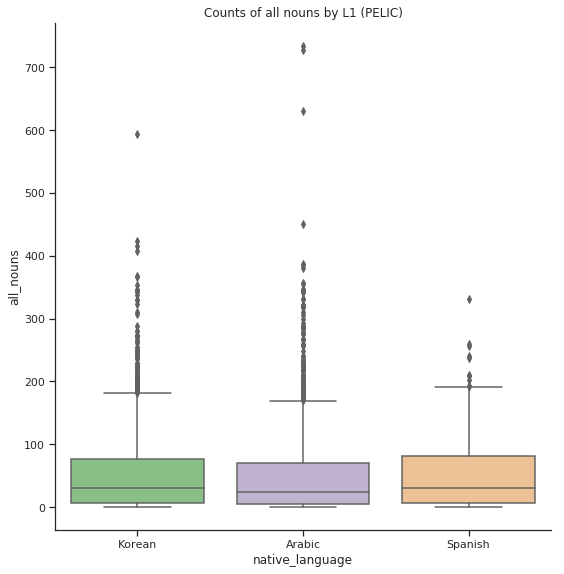

In [59]:
sns.set(style="ticks")
g = sns.catplot(x='native_language', y="all_nouns", kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Counts of all nouns by L1 (PELIC)')
g.savefig('../images/pelic_allnouns.png', bbox_inches='tight')

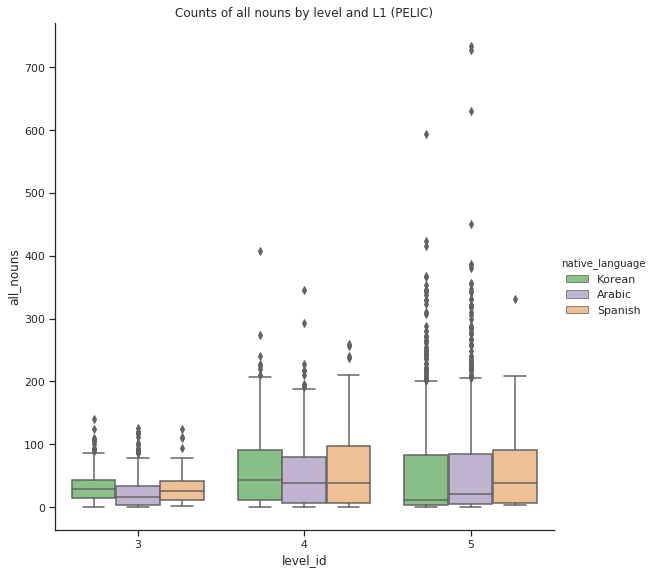

In [60]:
g = sns.catplot(x='level_id', y="all_nouns", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Counts of all nouns by level and L1 (PELIC)')
g.savefig('../images/pelic_allnouns_bylvl-L1.png', bbox_inches='tight')

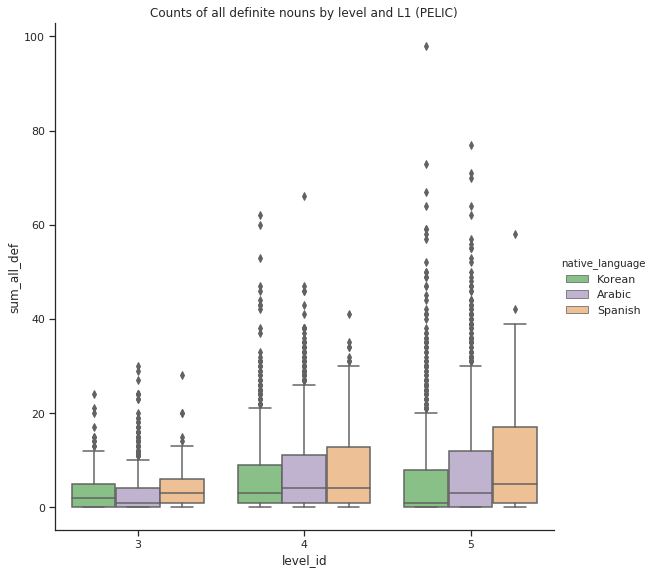

In [61]:
g = sns.catplot(x='level_id', y="sum_all_def", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Counts of all definite nouns by level and L1 (PELIC)')
g.savefig('../images/pelic_alldefns_bylvl-L1.png', bbox_inches='tight')

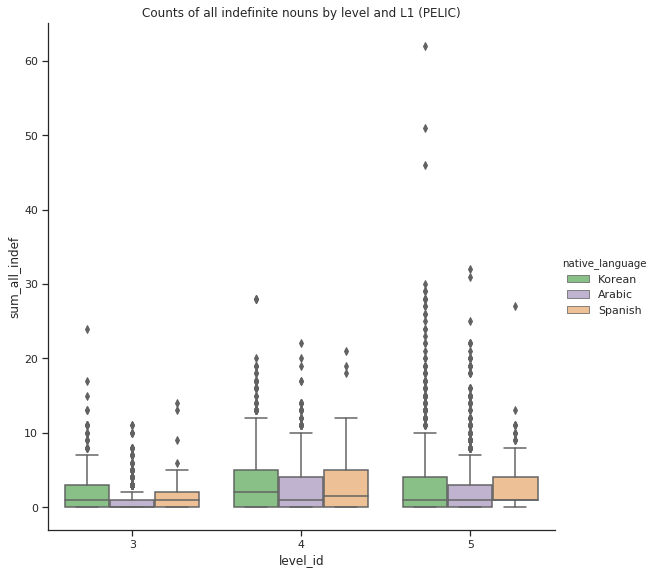

In [62]:
g = sns.catplot(x='level_id', y="sum_all_indef", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Counts of all indefinite nouns by level and L1 (PELIC)')
g.savefig('../images/pelic_allindefns_bylvl-L1.png', bbox_inches='tight')

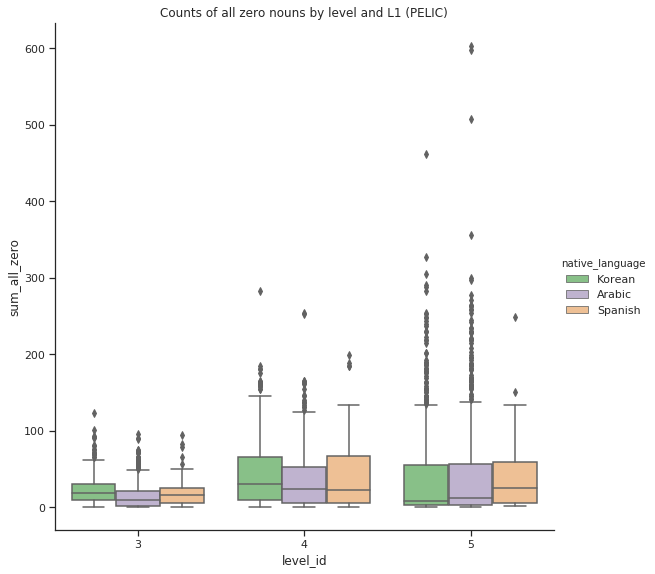

In [63]:
g = sns.catplot(x='level_id', y="sum_all_zero", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Counts of all zero nouns by level and L1 (PELIC)')
g.savefig('../images/pelic_allzerons_bylvl-L1.png', bbox_inches='tight')

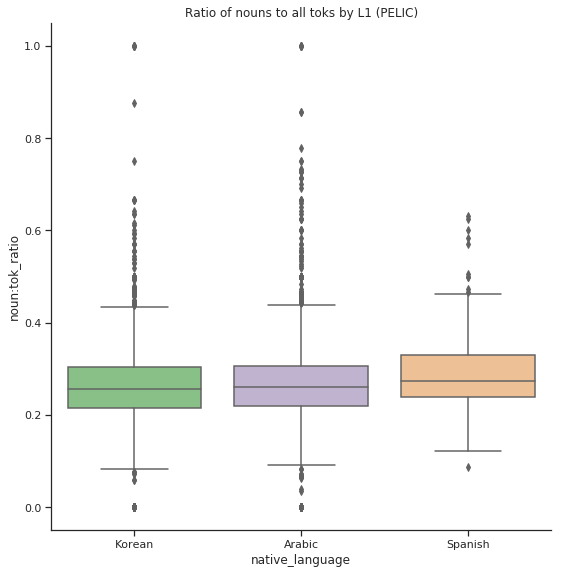

In [64]:
g = sns.catplot(x='native_language', y="noun:tok_ratio", kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Ratio of nouns to all toks by L1 (PELIC)')
g.savefig('../images/pelic_noun-tokratio.png', bbox_inches='tight')

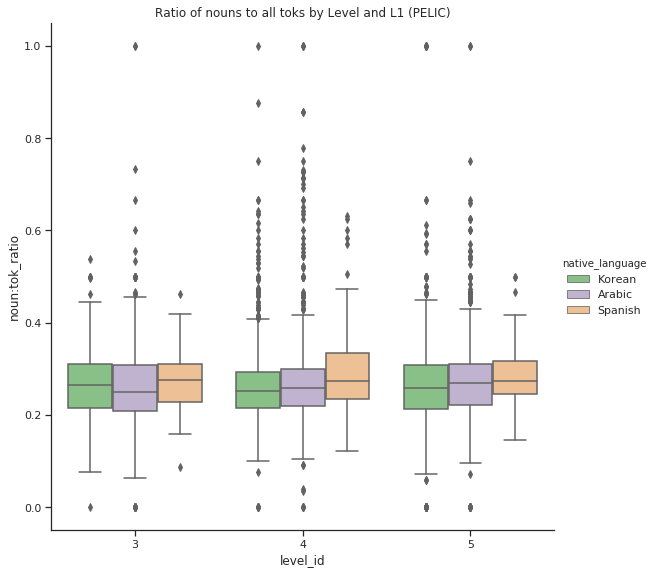

In [65]:
g = sns.catplot(x='level_id', y="noun:tok_ratio", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Ratio of nouns to all toks by Level and L1 (PELIC)')
g.savefig('../images/pelic_noun-tokratio_bylvl-L1.png', bbox_inches='tight')

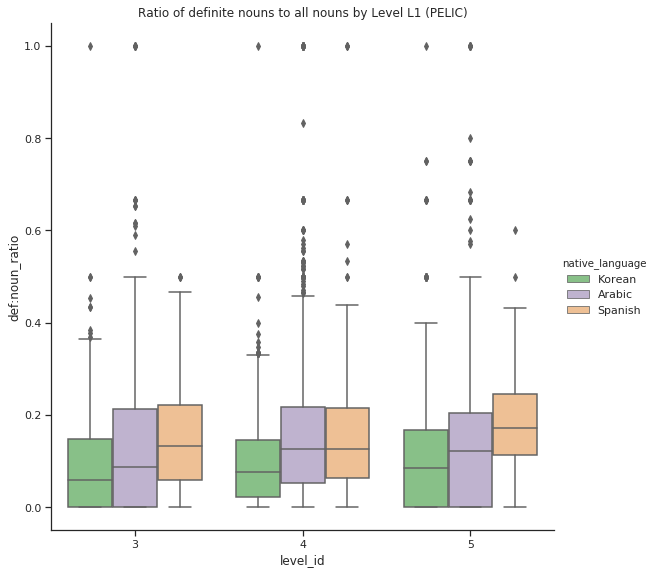

In [66]:
g = sns.catplot(x='level_id', y="def:noun_ratio", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Ratio of definite nouns to all nouns by Level L1 (PELIC)')
g.savefig('../images/pelic_defn-allnratio_bylvl-L1.png', bbox_inches='tight')

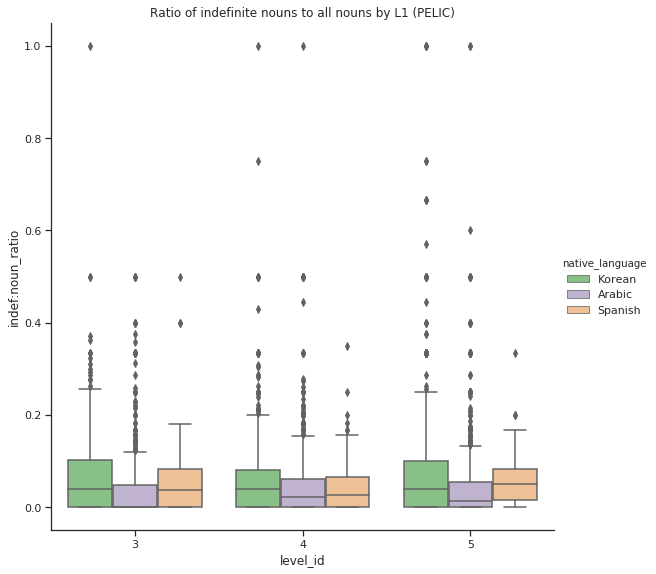

In [67]:
g = sns.catplot(x='level_id', y="indef:noun_ratio", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Ratio of indefinite nouns to all nouns by L1 (PELIC)')
g.savefig('../images/pelic_indefn-allnratio_bylvl-L1.png', bbox_inches='tight')

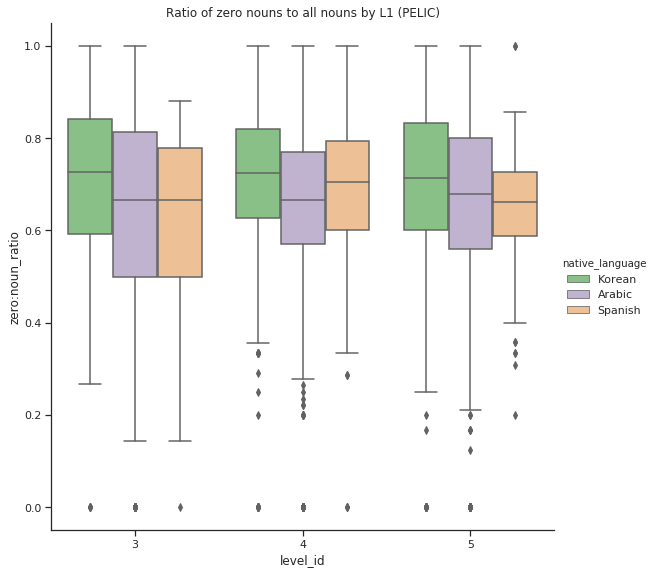

In [68]:
g = sns.catplot(x='level_id', y="zero:noun_ratio", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Ratio of zero nouns to all nouns by L1 (PELIC)')
g.savefig('../images/pelic_zeron-allnratio_bylvl-L1.png', bbox_inches='tight')

maybe trying to do some error analysis computationally

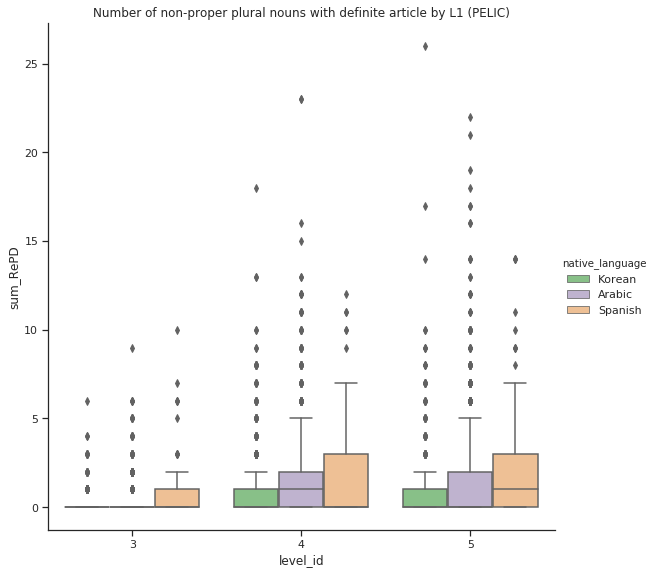

In [69]:
g = sns.catplot(x= 'level_id', y="sum_RePD", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Number of non-proper plural nouns with definite article by L1 (PELIC)')
g.savefig('../images/pelic_plns_def.png', bbox_inches='tight')

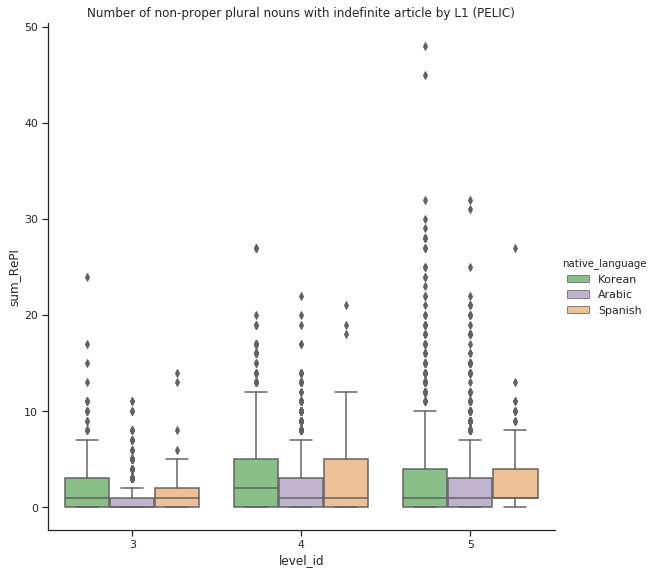

In [70]:
g = sns.catplot(x= 'level_id', y="sum_RePI", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Number of non-proper plural nouns with indefinite article by L1 (PELIC)')
g.savefig('../images/pelic_plns_indef.png', bbox_inches='tight')

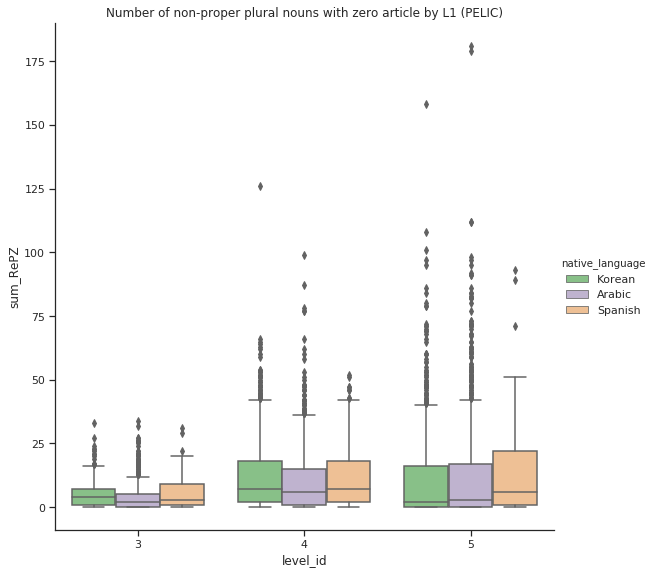

In [71]:
g = sns.catplot(x= 'level_id', y="sum_RePZ", hue= 'native_language', kind='box',
                data=pelic, palette="Accent", height=8)
plt.title('Number of non-proper plural nouns with zero article by L1 (PELIC)')
g.savefig('../images/pelic_plns_zero.png', bbox_inches='tight')

In [72]:
# read in from saved pelic 
pelic = pd.read_csv("../private/pelic_tagged.csv", index_col=[0])
pelic.head()

,question_id,anon_id,user_file_id,text,class_code,level_id,native_language,version,toks_re,toks_re_len,...,RegPlZero,sum_RePD,sum_RePI,sum_RePZ,noun:tok_ratio,def:noun_ratio,indef:noun_ratio,zero:noun_ratio,poss:noun_ratio,other:noun_ratio
answer_id,,,,,,,,,,,,,,,,,,,,,
5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",w,4,Korean,1,"['first', 'prepare', 'a', 'port', 'loose', 'te...",59,...,Counter({'minutes': 1}),0,1,1,0.305085,0.333333,0.055556,0.611111,0.000000,0.0
6,13,ad1,7508,By time,w,4,Korean,1,"['by', 'time']",2,...,Counter(),0,0,0,0.500000,0.000000,0.000000,1.000000,0.000000,0.0
7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",w,4,Korean,1,"['first', 'prepare', 'your', 'cup', 'loose', '...",39,...,Counter(),0,1,0,0.410256,0.125000,0.062500,0.625000,0.187500,0.0
8,13,eg5,7509,"I organized the instructions by time, beacause...",w,4,Korean,1,"['i', 'organized', 'the', 'instructions', 'by'...",35,...,Counter({'people': 1}),3,0,1,0.314286,0.272727,0.000000,0.727273,0.000000,0.0
15,12,hb4,7513,"In my country, make a tea is very easy because...",w,4,Korean,1,"['in', 'my', 'country', 'make', 'a', 'tea', 'i...",48,...,"Counter({'bags': 1, 'Fitst': 1})",0,4,2,0.270833,0.153846,0.307692,0.384615,0.153846,0.0


In [73]:
pelic.iloc[5]

question_id                                                        13
anon_id                                                           hb4
user_file_id                                                     7513
text                Every paragragh's instructions depend on a mai...
class_code                                                          w
level_id                                                            4
native_language                                                Korean
version                                                             1
toks_re             ['every', 'paragragh', 's', 'instructions', 'd...
toks_re_len                                                        28
toks_nltk           ['Every', 'paragragh', "'s", 'instructions', '...
Guiraud                                                       4.72456
pos                 [('Every', 'DT'), ('paragragh', 'NN'), ("'s", ...
article_info        [('paragragh', 0, 0, 0, 0, 0, 0), ('idea', 0, ...
all_def             

In [75]:
c = Counter()
for item in pelic.all_def:
    c.update(item)
c.most_common(15)

[("'", 50784), (' ', 46763), ('e', 25644), (':', 25395), (',', 21370), ('1', 20129), ('t', 19019), ('r', 17751), ('o', 17439), ('n', 17150), ('s', 12380), ('i', 11998), ('a', 11085), ('u', 10659), ('l', 6964)]

In [96]:
def getCounter(df, level, column, article, name):
    c = Counter()
    for item in df[df.level_id == level][column]:
        c.update(item)
    df = pd.DataFrame(data=c, index=[0]).T
    df = df.sort_values(by=[0], ascending=False)
    df = df.reset_index([0])
    df.columns = ['word', 'count']
    df['article'] = article
    df['name'] = name
    return df

In [98]:
# get all the Arabic
A3D = getCounter(arabic, 3, 'all_def', 'definite', 'Arabic L1, Level 3')
A3I = getCounter(arabic, 3, 'all_indef', 'indefinite', 'Arabic L1, Level 3')
A3Z = getCounter(arabic, 3, 'all_zero', 'zero', 'Arabic L1, Level 3')

A4D = getCounter(arabic, 4, 'all_def', 'definite', 'Arabic L1, Level 4')
A4I = getCounter(arabic, 4, 'all_indef', 'indefinite', 'Arabic L1, Level 4')
A4Z = getCounter(arabic, 4, 'all_zero', 'zero', 'Arabic L1, Level 4')

A5D = getCounter(arabic, 5, 'all_def', 'definite', 'Arabic L1, Level 5')
A5I = getCounter(arabic, 5, 'all_indef', 'indefinite', 'Arabic L1, Level 5')
A5Z = getCounter(arabic, 5, 'all_zero', 'zero', 'Arabic L1, Level 5')

In [99]:
# get all the Korean
K3D = getCounter(korean, 3, 'all_def', 'definite', 'Korean L1, Level 3')
K3I = getCounter(korean, 3, 'all_indef', 'indefinite', 'Korean L1, Level 3')
K3Z = getCounter(korean, 3, 'all_zero', 'zero', 'Korean L1, Level 3')

K4D = getCounter(korean, 4, 'all_def', 'definite', 'Korean L1, Level 4')
K4I = getCounter(korean, 4, 'all_indef', 'indefinite', 'Korean L1, Level 4')
K4Z = getCounter(korean, 4, 'all_zero', 'zero', 'Korean L1, Level 4')

K5D = getCounter(korean, 5, 'all_def', 'definite', 'Korean L1, Level 5')
K5I = getCounter(korean, 5, 'all_indef', 'indefinite', 'Korean L1, Level 5')
K5Z = getCounter(korean, 5, 'all_zero', 'zero', 'Korean L1, Level 5')

In [100]:
# get all the Spanish
S3D = getCounter(spanish, 3, 'all_def', 'definite', 'Spanish L1, Level 3')
S3I = getCounter(spanish, 3, 'all_indef', 'indefinite', 'Spanish L1, Level 3')
S3Z = getCounter(spanish, 3, 'all_zero', 'zero', 'Spanish L1, Level 3')

S4D = getCounter(spanish, 4, 'all_def', 'definite', 'Spanish L1, Level 4')
S4I = getCounter(spanish, 4, 'all_indef', 'indefinite', 'Spanish L1, Level 4')
S4Z = getCounter(spanish, 4, 'all_zero', 'zero', 'Spanish L1, Level 4')

S5D = getCounter(spanish, 5, 'all_def', 'definite', 'Spanish L1, Level 5')
S5I = getCounter(spanish, 5, 'all_indef', 'indefinite', 'Spanish L1, Level 5')
S5Z = getCounter(spanish, 5, 'all_zero', 'zero', 'Spanish L1, Level 5')

In [101]:
S5Z.head(2)

,word,count,article,name
0,people,166,zero,"Spanish L1, Level 5"
1,Pittsburgh,56,zero,"Spanish L1, Level 5"


/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


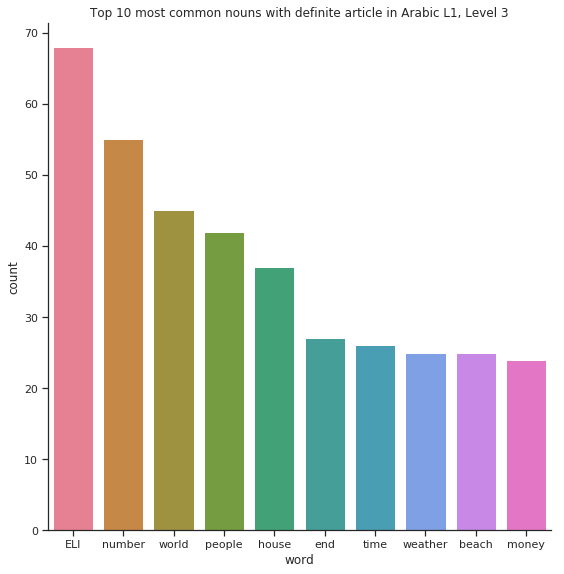

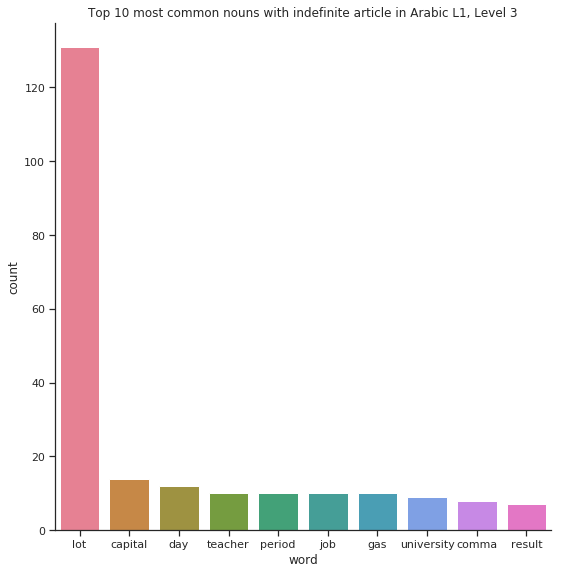

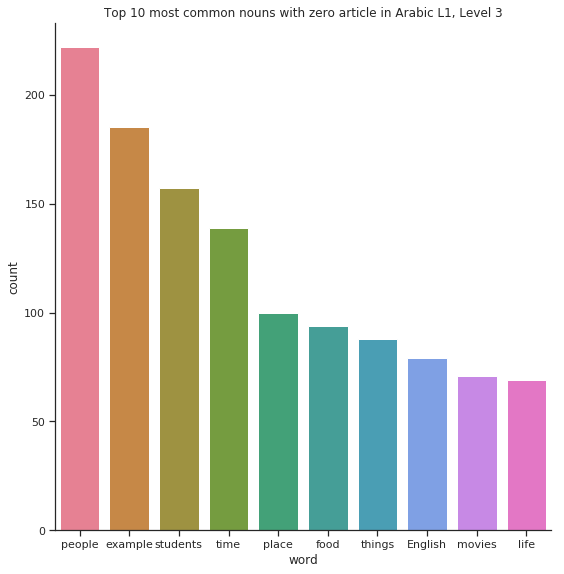

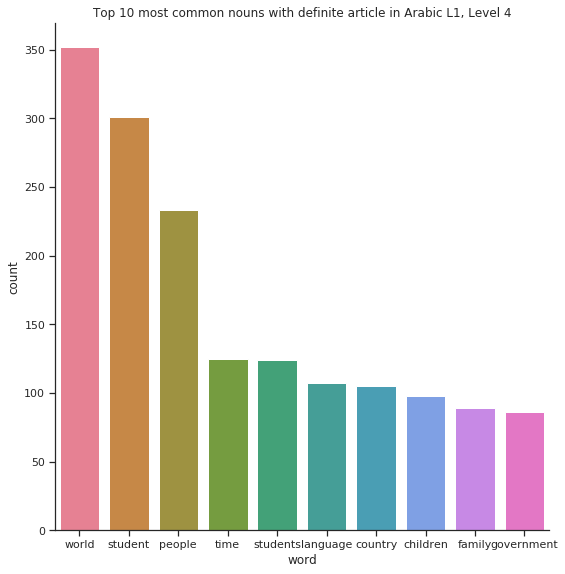

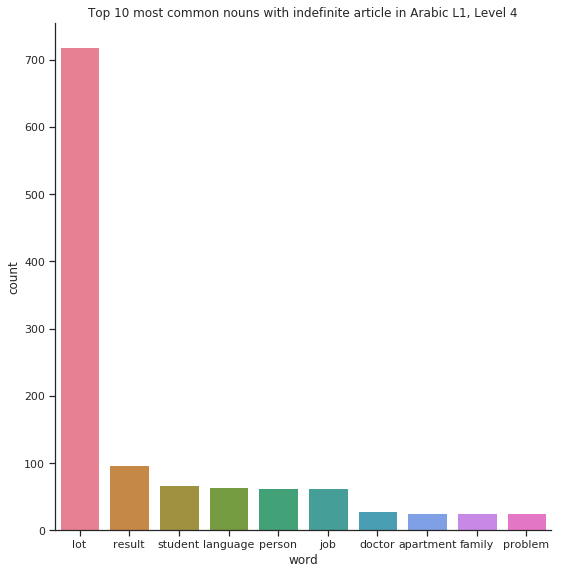

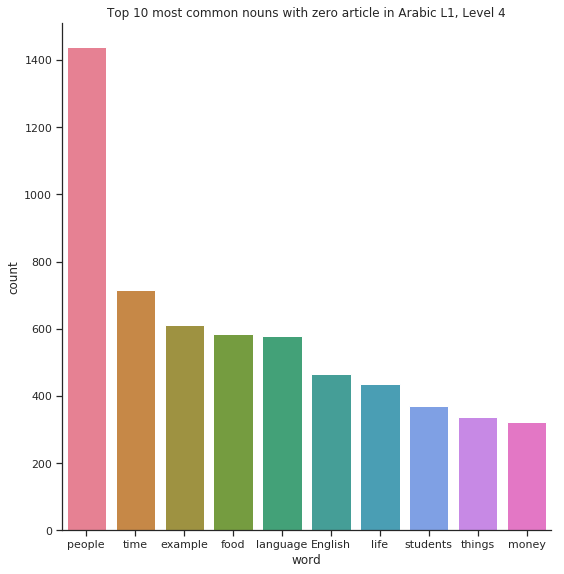

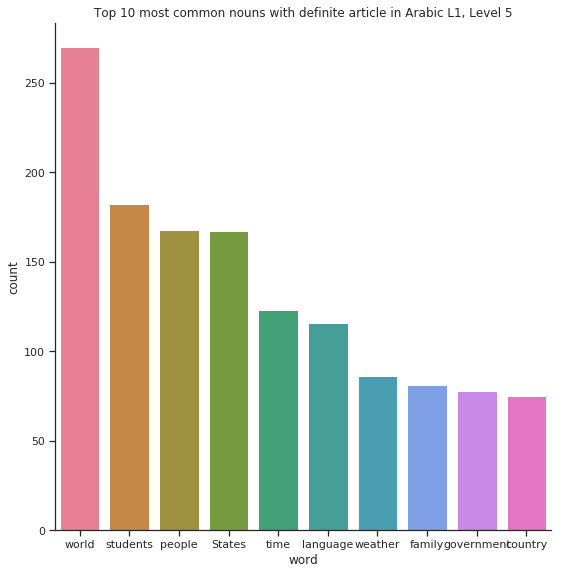

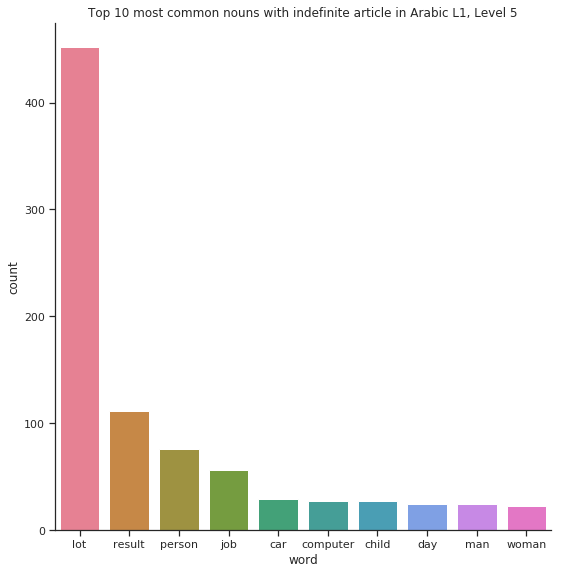

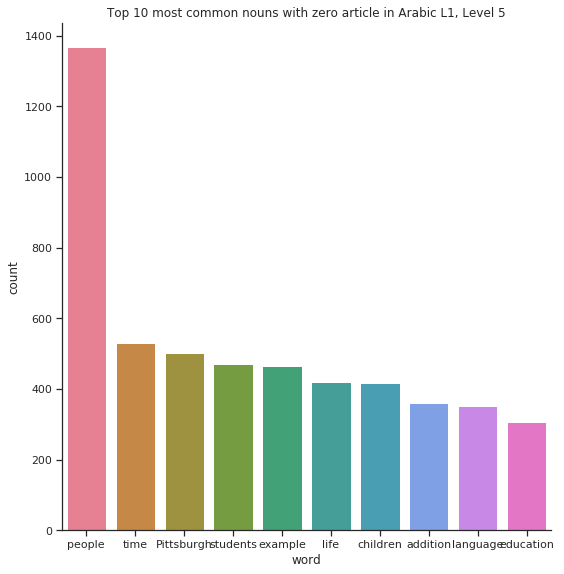

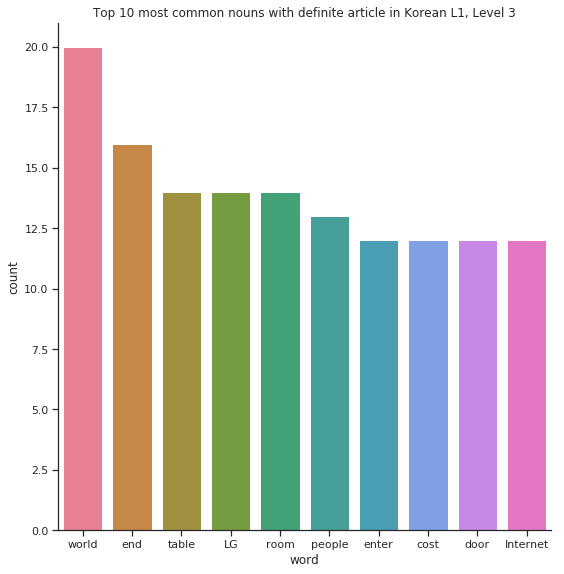

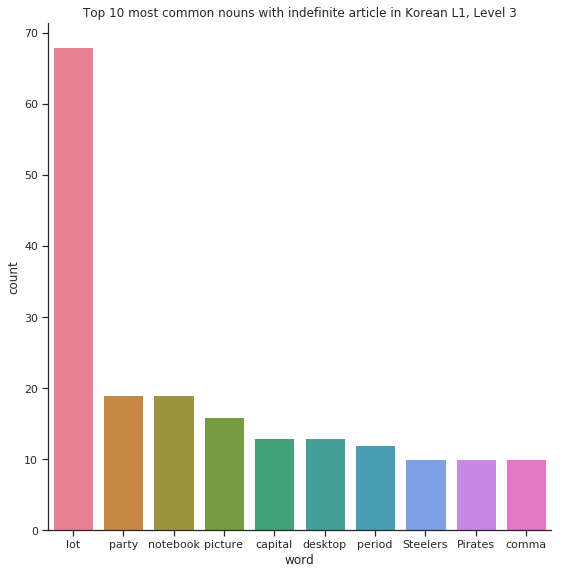

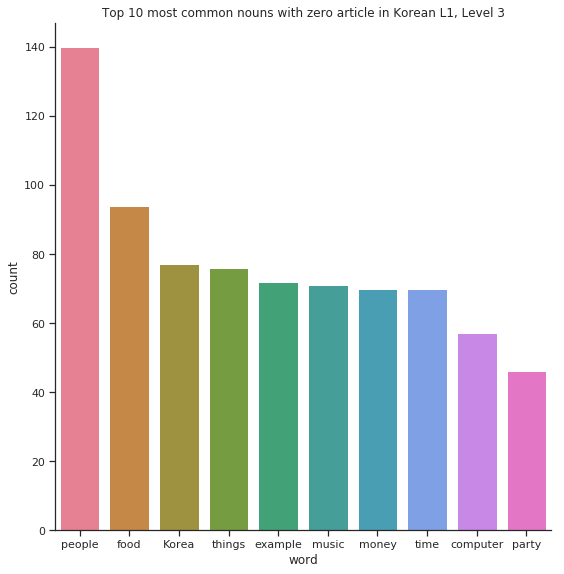

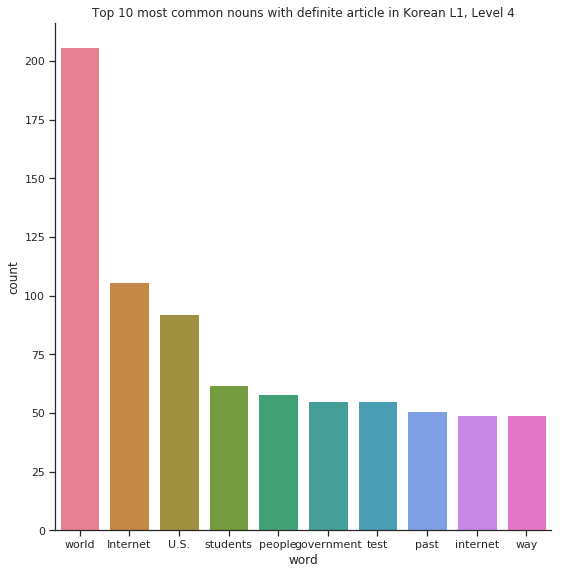

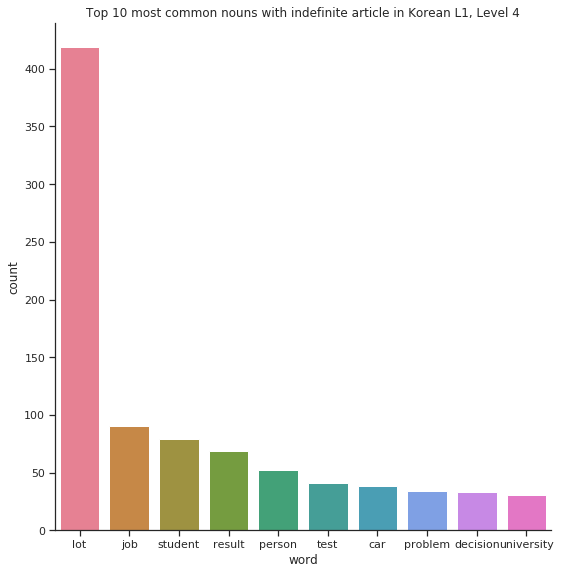

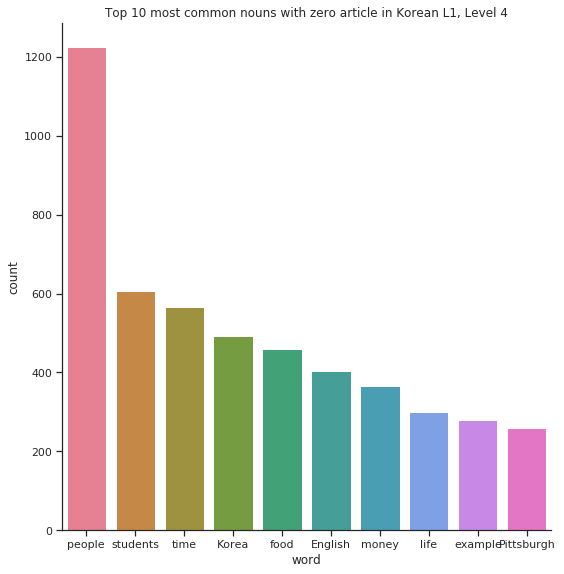

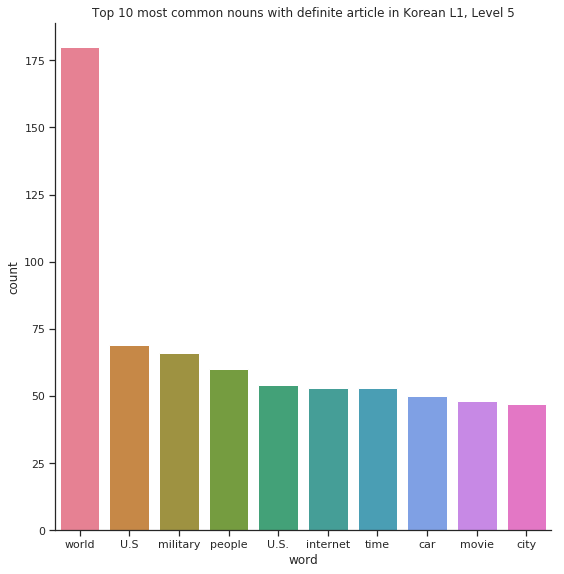

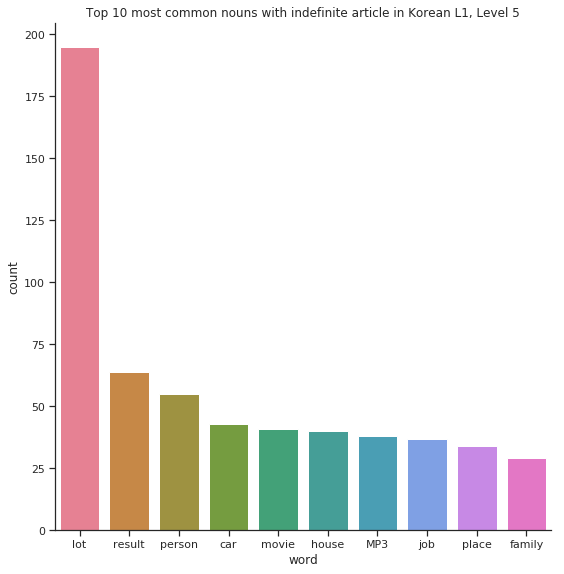

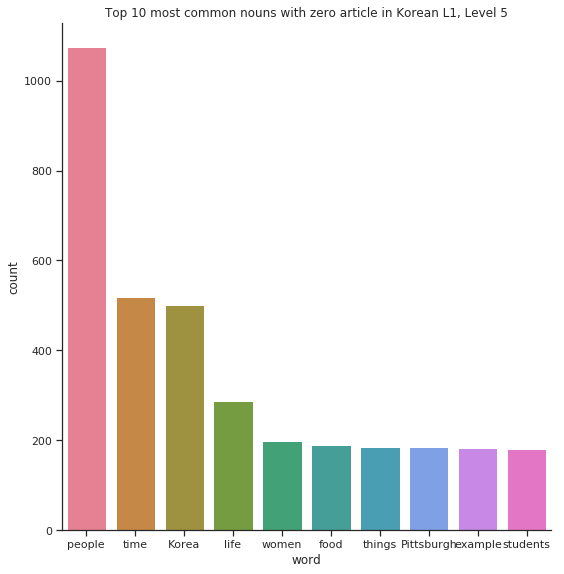

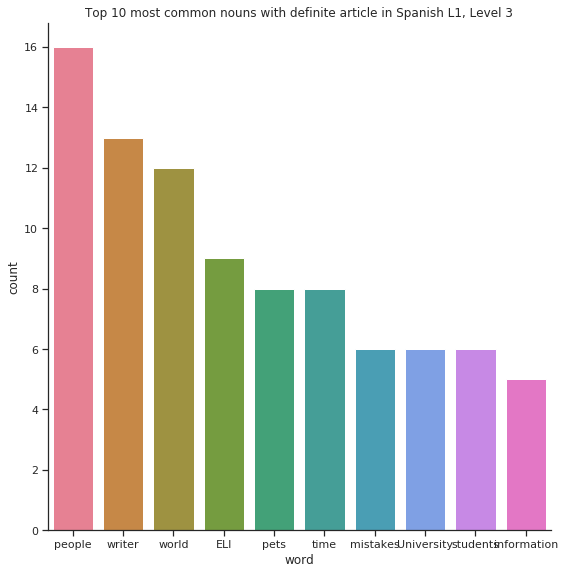

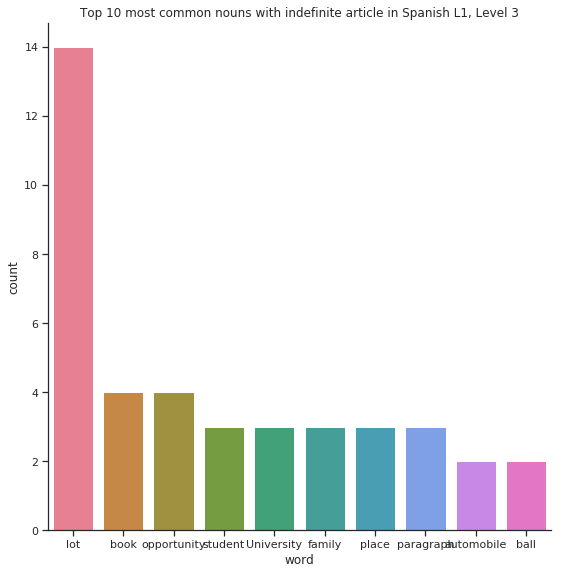

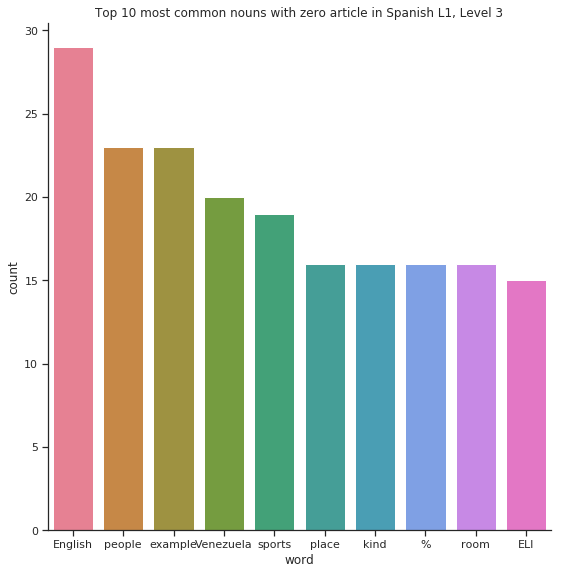

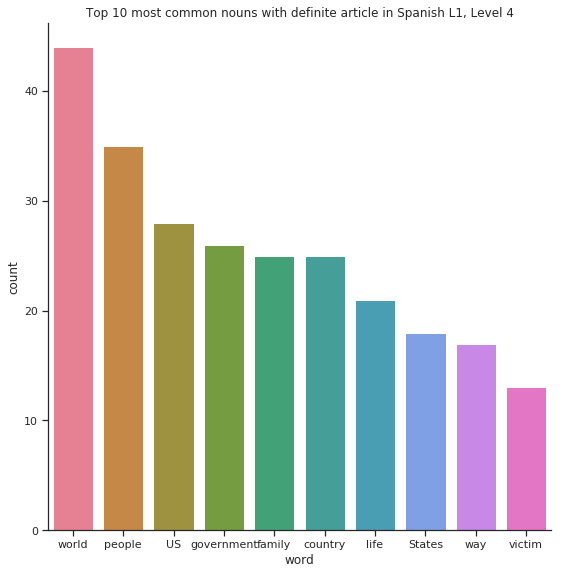

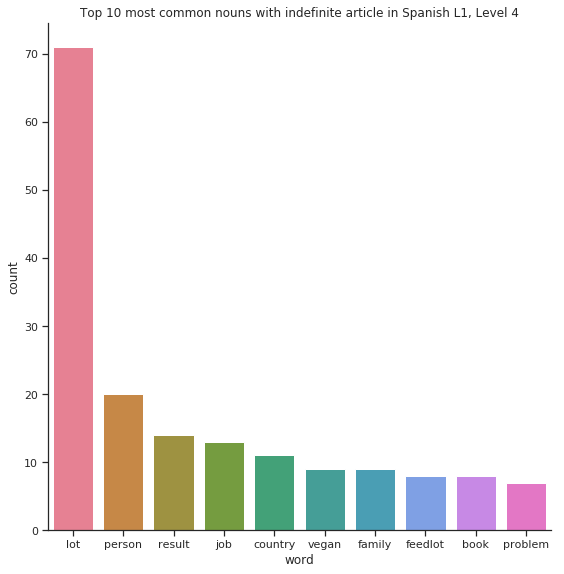

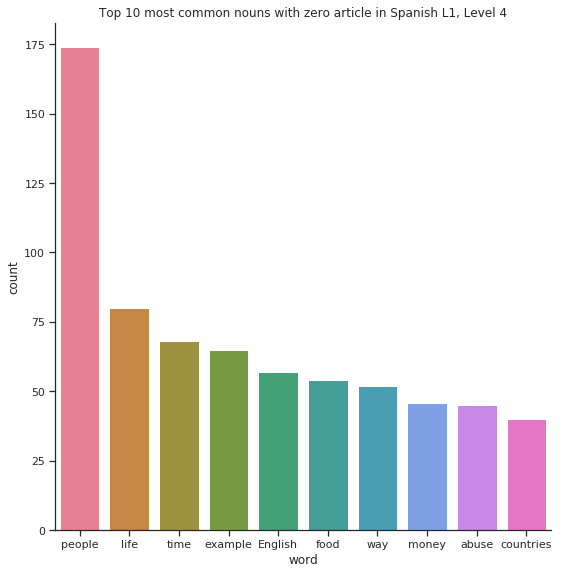

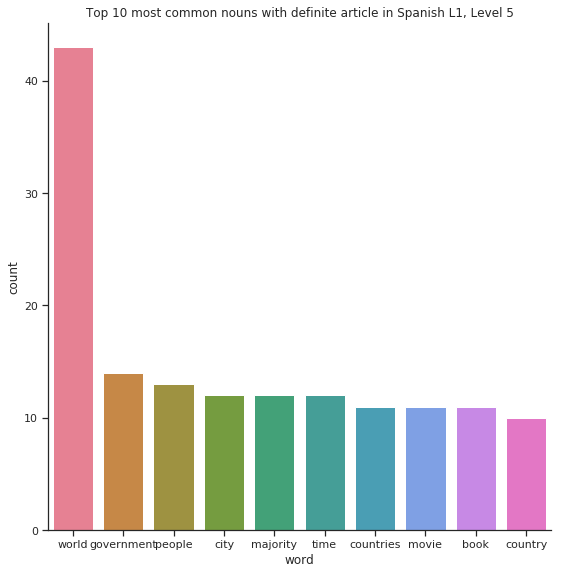

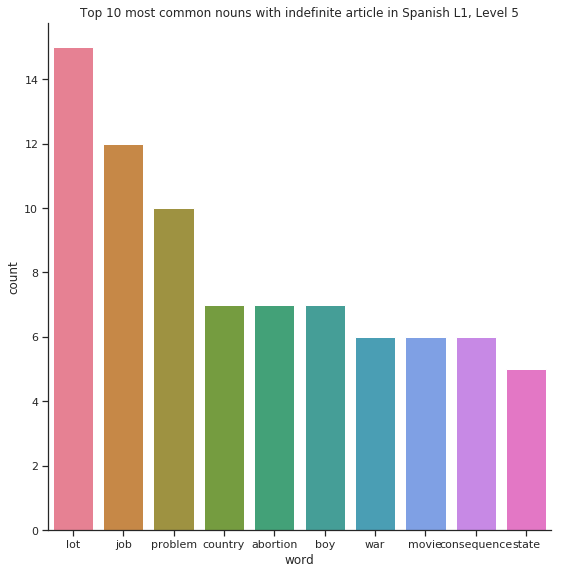

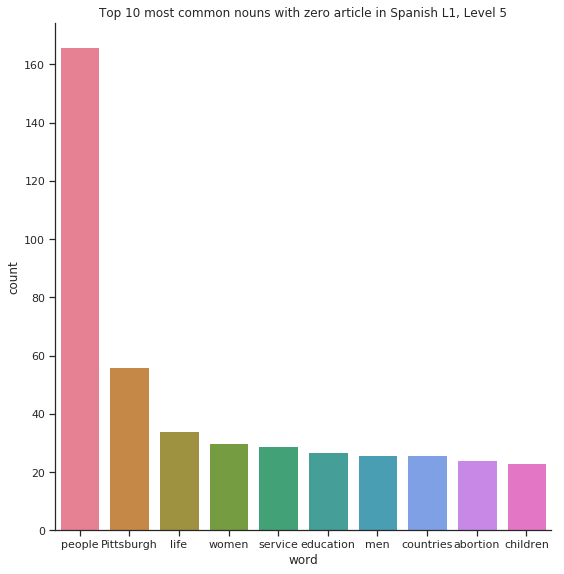

In [106]:
dfs = [A3D, A3I, A3Z, 
       A4D, A4I, A4Z,
       A5D, A5I, A5Z,
       K3D, K3I, K3Z, 
       K4D, K4I, K4Z,
       K5D, K5I, K5Z,
       S3D, S3I, S3Z, 
       S4D, S4I, S4Z,
       S5D, S5I, S5Z,]
root = '../images/'
name = 'pelic_mostcommon_'
num = 1
ext = '.png'
for df in dfs:
    g = sns.catplot(x= 'word', y="count", kind='bar',
                data=df.head(10), palette="husl", height=8)
    plt.title('Top 10 most common nouns with '+df['article'][0]+' article in '+df['name'][0])
    g.savefig(root+name+str(num)+ext, bbox_inches='tight')
    num += 1